# Our first machine learning model: Logistic Regression

In [96]:
# Import our libraries 
!pip install -U scikit-learn scipy matplotlib
# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

Requirement already up-to-date: scikit-learn in c:\python38\lib\site-packages (0.23.2)
Requirement already up-to-date: scipy in c:\python38\lib\site-packages (1.5.2)
Requirement already up-to-date: matplotlib in c:\python38\lib\site-packages (3.3.2)


# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [113]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv('data/titanic.csv')

# Display data
df.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [114]:
# let's check the shape and size of the data set
# creating a new dataframe to check who survived using 0 and 1
df['survived'] = df['survived'].map({0: ' died', 1:'survived'})

In [99]:
# print out the shape an size
print(df.shape)
# so there are 891 rows and 12 columns 

(891, 12)


In [100]:
# now I want a little more information on what my table looks like
df.describe()
# looking at the table I can see that count, mean, std, and everything else 
# it looks like there were 891 people on board ( that were documented)
# Not sure what the age means 
# passengers id doesn't matter 
# mean age looks to be 30 years old 


passengerid      pclass         age       sibsp       parch        fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [101]:
#What can I learn about each column?
df.info()
# I see that there are plenty non-null values, are there any nulls?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    object 
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [102]:
# Identify which columns have null values. 
df.isnull().sum()
#really weird to see 891 null values in survived

# let's check the percentage of nulls per column
((df.isnull().sum() / len(df)) * 100).round(2)

#i'm just going to ignore survived... but i do see age, cabin, and embarked have nulls

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [103]:
# Check to see if our data has any duplicate rows.
dupes = df.duplicated().sum()
print("number of duplicates duplicated rows %i " % dupes )

number of duplicates duplicated rows 0 


# Use sns.pariplot to visualize.
* Set the hue='survived'.

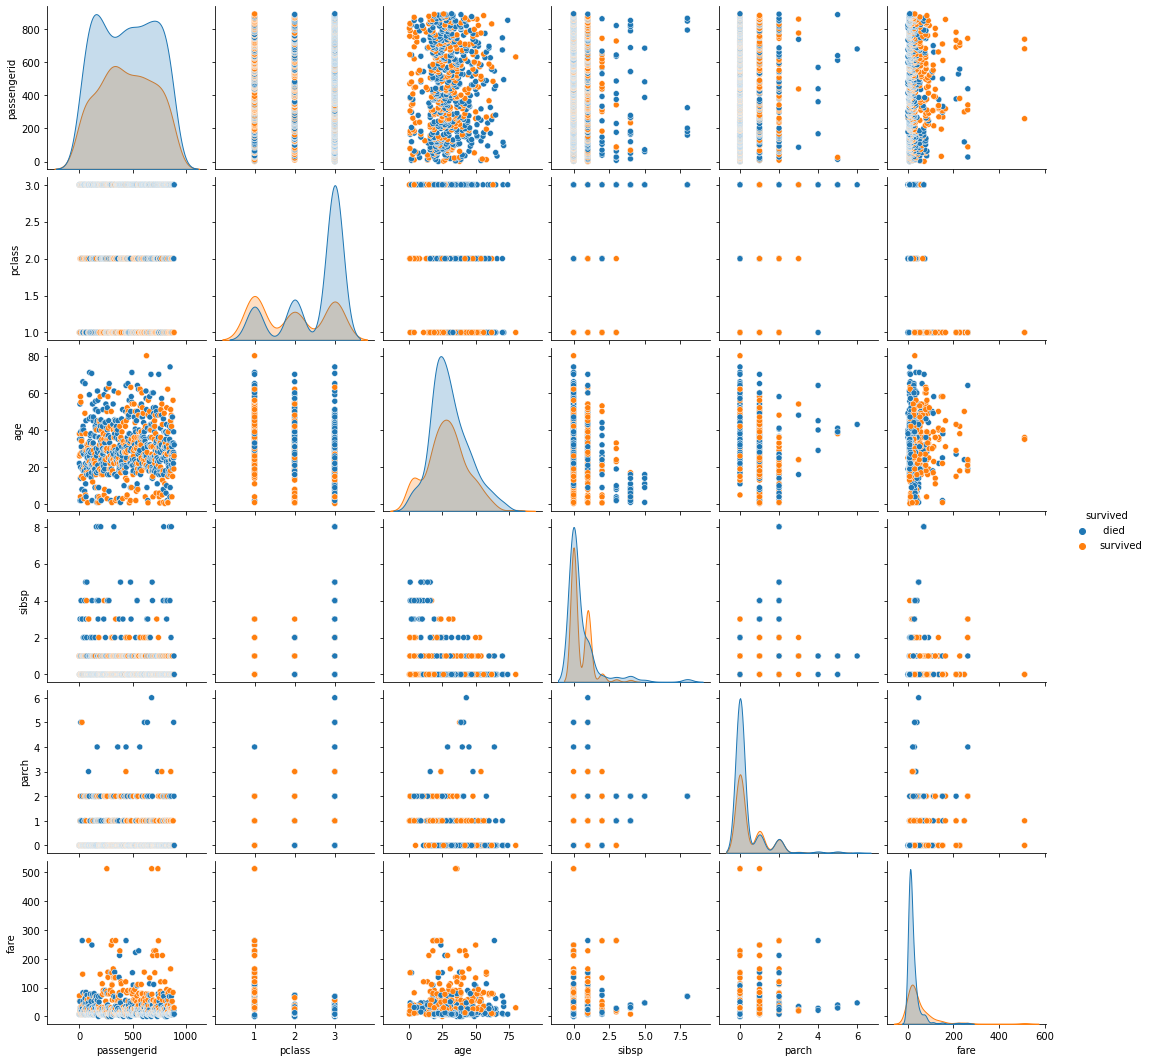

In [104]:
# Use sns.pariplot to visualize.


# now I want to compare ever
sns.pairplot(df, hue="survived");

<AxesSubplot:xlabel='age', ylabel='Density'>

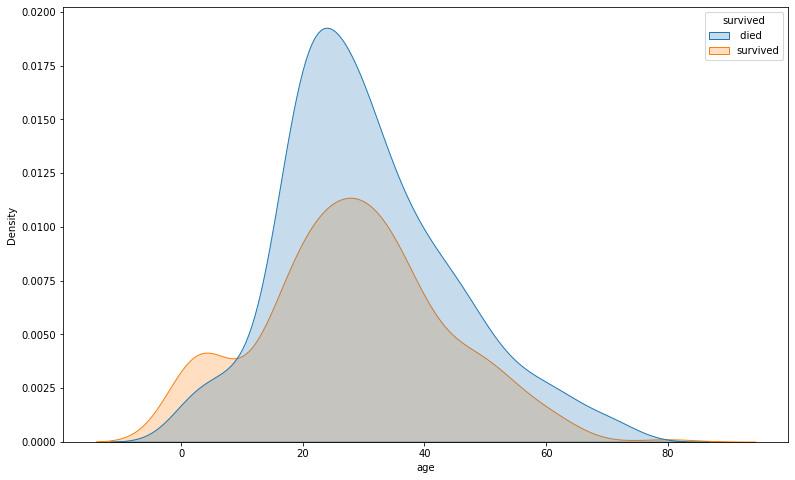

In [105]:
# i want to plot age with survived to see what age range was likely to have survived 

plt.figure(figsize=(13,8))
sns.kdeplot(data=df, x='age',hue='survived',shade=True)

# I see the age range of people who survived are in their 30's and some infants
# most people in their 20's and 30's died too 

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [106]:
# now it's time to train my data but first let's get the table for reference 
df.head()

passengerid  survived  pclass  \
0            1      died       3   
1            2  survived       1   
2            3  survived       3   
3            4  survived       1   
4            5      died       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [107]:
# looking at the data I want to predict who survived and who died
# the values i'm interested in for survival is the fare and the sex
# I want my ML algo to look at each category and give me a probability value that they survived 

# it's best not to use features that have nulls in them 

# i want to make sure my variables are all numerical values because this is classicification 
# and classification deals with numerical values 


In [108]:
# let's look at the survival rate 
df.survived.value_counts()

# self explanatory, we want our algorithm to predict that 549 died and 342 survived

 died       549
survived    342
Name: survived, dtype: int64

In [109]:
# what about the number of total males and females ?
df.sex.value_counts()

# 577 males
# 314 females

male      577
female    314
Name: sex, dtype: int64

In [110]:
# what about the fares?
df.fare.value_counts()

# so it looks like we're comparing fares to sex to predict if fares has a relationship with sex of a passenger

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

In [123]:
# Convert the sex column into a continuous variable by using pd.get_dummies
# so now I have the information I need
# it's time to turn my category variables into numerical indicators for sex and fares 
# I wonder if we can name another variable to hold the titanic relationship between sex and fares

df = pd.get_dummies(df, columns=["sex"],drop_first=True)
df.head()

# so as we can see, there were two new columns added
# one for sex_female and one for sex_male 
# this is bit redundant so let's just drop the first column

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [124]:
# so now I have a chart that shows the male column and the fares
# i want to select these as features to predict a relational probability outcome

# Select our features
selected_features = ["sex_male","fare"]

# Set X to be the features we are going to use.
X = df[selected_features].values

# so i am choosing to train the x values with the y values 

# Set y to be our target variable. 
y = df['survived'].values

# the y value holds the targetable values that we're trying to predict

# Split our data into the testing and training groups. 

In [76]:
from sklearn.model_selection import train_test_split

# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# train test split allows for indexable sequencing of same length 
# takes in dataframes and arrays and lists + more
# parameters:
# x -> array input (our selected features)
# y -> our target features 
# test_size -> uhhh idk looks like represents the number of test samples
# random_state -> something about shuffling

# the return value of train_test_split is 4 values that get assigned to xtrain, xtest, ytrain, and ytest respectively 

# Print the length and width of our testing data.
print('Length of our Training data:', len(X_train), '\nLength of our Testing data:', len(X_test))

Length of our Training data: 712 
Length of our Testing data: 179


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [77]:
# Initalize our model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Train our model using our training data.
print(type(model))


#chaching... it's a logisticregression

# let's train ;p
model.fit(X_train, y_train)

# i guess something happened in place and it just outputs a function that doesn't return anything
# ding your hotpockets are ready


<class 'sklearn.linear_model._logistic.LogisticRegression'>


LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [78]:
# 1. Make predictions of your test data and save them as `y_pred`. 

# this part is a litle vague 

y_pred = model.predict(X_test)
y_pred

# i calculated the probability of people dying and surviving
# the ourput is an array and I know that we can't test y because that is our target that is a string 

# we can only use numerical data to calculate the model

# y prediction is the prediction of dead or alive 


array([' died', ' died', 'survived', ' died', 'survived', 'survived',
       ' died', ' died', ' died', ' died', ' died', ' died', ' died',
       'survived', ' died', ' died', ' died', ' died', ' died', ' died',
       ' died', ' died', ' died', 'survived', 'survived', ' died',
       ' died', ' died', ' died', ' died', ' died', ' died', ' died',
       ' died', ' died', ' died', 'survived', 'survived', ' died',
       'survived', 'survived', ' died', ' died', ' died', ' died',
       ' died', 'survived', ' died', 'survived', ' died', 'survived',
       ' died', 'survived', 'survived', ' died', ' died', 'survived',
       'survived', 'survived', ' died', ' died', 'survived', ' died',
       ' died', ' died', 'survived', ' died', ' died', ' died', ' died',
       ' died', ' died', ' died', ' died', ' died', ' died', ' died',
       ' died', 'survived', 'survived', ' died', ' died', ' died',
       ' died', ' died', 'survived', 'survived', ' died', 'survived',
       'survived', ' died'

In [79]:
# so this looks a mess... 
# let's have python convet into pretty numbers 
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba
# well it looks like the numbers indicate the probability that someone died
# not sure if this is a good indicator but we're playing around 

array([0.25851794, 0.17314272, 0.7075879 , 0.26733823, 0.72718947,
       0.77181363, 0.17124289, 0.17210499, 0.17255794, 0.17357017,
       0.17450389, 0.17223534, 0.20418745, 0.6747035 , 0.17210499,
       0.17223534, 0.17235194, 0.17230384, 0.22259244, 0.20472746,
       0.17255794, 0.17206386, 0.18172987, 0.81667677, 0.66293852,
       0.22510027, 0.17230384, 0.16600219, 0.17471192, 0.17255794,
       0.1712088 , 0.17124289, 0.25972793, 0.18623729, 0.30750482,
       0.20777583, 0.69122377, 0.71104607, 0.20777583, 0.91161446,
       0.66222856, 0.17206386, 0.20073797, 0.17496182, 0.17124289,
       0.17189942, 0.78063834, 0.18259004, 0.90682188, 0.30139165,
       0.66249766, 0.17210499, 0.84066254, 0.69800077, 0.20418745,
       0.17124289, 0.81566617, 0.76792649, 0.74337816, 0.17206386,
       0.24620077, 0.73899395, 0.17235194, 0.17255794, 0.17412993,
       0.8689289 , 0.17230384, 0.18087285, 0.24620077, 0.17134534,
       0.17206386, 0.22090688, 0.17663499, 0.17273658, 0.21179

In [80]:
# let's get a fancy graph to put our predictions in 
pred_df = pd.DataFrame.from_dict({'y_true' : y_test, 'y_pred': y_pred, 'probability': y_pred_proba})
pred_df

# so this looks like we are comparing the truth value to the predicted value
# looking at the first colum we see that the prob of y was 0.258 
# and the ML algo predicted incorrectly that the person is dead 
# Soooo in a logistic regression this would be towards the lower end and would be a false negative 

y_true    y_pred  probability
0    survived      died     0.258518
1        died      died     0.173143
2    survived  survived     0.707588
3        died      died     0.267338
4        died  survived     0.727189
..        ...       ...          ...
174      died      died     0.180873
175  survived      died     0.179976
176  survived      died     0.170793
177  survived  survived     0.724028
178      died      died     0.172105

[179 rows x 3 columns]

In [81]:
# now i'm curious to find out how accurate was my model? 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

# this thingy brings up our confusion_matrix... indeed it is confusing.
# TP yes mean yes
# TN no means no 
# FP yes means no
# FN no means yes

# let's check accuracy of this thing -> (TP + TN) / (TP + FN + FP + TN)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

# it looks like y test is the result of the TP and TN 
# and y Predictions is the total predictions tp tn fn fp 

# lit

Accuracy Score: 0.826816


In [82]:
from sklearn.metrics import f1_score
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# so now let's span this out to all the metrics and see what we get... 

# let's check accuracy of this thing -> (TP + TN) / (TP + FN + FP + TN)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)


# Calculate our precision score
# out of all the times the model says yes, was it correct tho (thinking face)? 
# we need to raise the threshold of our classification if we want to raise precision
# let's check precision of this thing -> (TP) / (TP + FP)
precision = precision_score(y_test, y_pred, pos_label='survived')
print("Precision Score: %f" % precision)
# print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

# Calculate our recall score
# let's check accuracy of this thing -> (TP + TN) / (TP + FN + FP + TN)
recall = recall_score(y_test, y_pred, pos_label='survived')
print("Recall Score: %f" % recall)
# print("Correctly identifies %f percent of all survivors" % recall)


# let's check F1 score of this thing -> (TP + TN) / (TP + FN + FP + TN)
f1 = f1_score(y_test, y_pred, pos_label='survived')
print("F1_score: %f" % f1)

Accuracy Score: 0.826816
Precision Score: 0.738462
Recall Score: 0.774194
F1_score: 0.755906


true-negitive: 0 
false-positive: 0 
false-negative: 0 
true-positive: 48


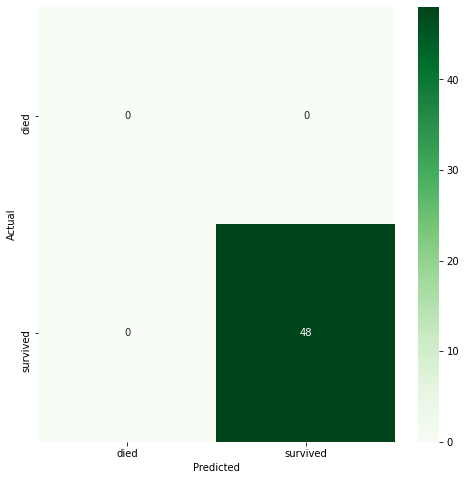

In [83]:
# 1. Plot a confusion matrix of your predicted results. 
labels=['died', 'survived']

cm = confusion_matrix(y_test, y_pred, labels=['died', 'survived'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=['died', 'survived']).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)




In [84]:
# How many True Positives and True Negatives did your model get?
print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

# not sure if my data reflects this, it doesn't appear so to me. 

true-negitive: 0 
false-positive: 0 
false-negative: 0 
true-positive: 48


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

In [125]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
# now we are going to use pclass and embarked 
df = pd.get_dummies(df, columns=['pclass','embarked'], drop_first=True)
df

passengerid  survived                                               name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     fare cabin  pclass_2  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN         0   
1    female  38.0      1      0          PC 17599  71.2833   C85         0   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN         0   
3    female  35.0      1      0            113803  53.1000  C123         0   
4      male  35.0      0      0            373450   8.0500   NaN         0   
..      ...   ...    ...    ...               ...      ...   ...       ...   
886    male  27.0      0      0            211536  13.0000   NaN         1   
887  female  19.0      0      0            112053  30.0000   B42         0   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN         0   
889    male  26.0      0      0            111369  30.0000  C148         0   
890    male  32.0      0      0            370376   7.7500   NaN         0   

     pclass_3  embarked_Q  embarked_S  
0           1           0           1  
1           0           0           0  
2           1           0           1  
3           0           0           1  
4           1           0           1  
..        ...         ...         ...  
886         0           0           1  
887         0           0           1  
888         1           0           1  
889         0           0           0  
890         1           1           0  

[891 rows x 14 columns]

In [85]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
# now we are going to use pclass and embarked 
df = pd.get_dummies(df, column=[pclass])

# Update your `selected_features` to include the new pclass and embarked features. 

# Define your X and y variables


# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before


# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 

# Calculate our accuracy
accuracy_2 = ???

# Calculate our precision score
precision_2 = ???

# Calculate our recall score
recall_2 = ???

# Calculate your f1-score
f1_2 = ???

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');



SyntaxError: invalid syntax (<ipython-input-85-1ba1312ca0f2>, line 24)

# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [ ]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.


# Fill null age values with mean age.


# Create new traveled_alone feature


# Update your `selected_features` to include the new traveled alone and age


# Define your X and y variables


# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 


# Calculate our accuracy
accuracy_3 = 

# Calculate our precision score
precision_3 = 

# Calculate our recall score
recall_3 = 

# Calculate your f1-score
f1_3 = 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');